In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('data/Surface_Drinking_Water_Importance__Feature_Layer_.csv')
us_geo = gpd.read_file('images/us_geo.json')

In [39]:
def huc_area(df, lower_lim, upper_lim, col_name='IMP1'): # -> dataframe, int, int, str
    #defines an region with the hydrologic unit code
    #returns a DataFrame with that area
    df_state = df[(df['HUC_12'] >= lower_lim*100000000) & (df['HUC_12'] < upper_lim*100000000)]
    return df_state[(df_state[col_name] > 0) & (df_state[col_name] > 0.0)]

def pop_total(huc_df):  # -> dataframe from huc_area()
    #returns a population served with the defined region of HUC's
    return huc_df[huc_df['POPSERVED']>0]
    
test=huc_area(df, 100, 200, 'POPSERVED')    
test == pop_total(test)

,HUC_12,HU_12_NAME,IMP1,IN_FOR2,IN_PRONF2,IN_NFS2,IN_PRI2,INS_FOR3,DEV_FOR3,FIR_FOR3,...,PER_NFS2,PER_PRI2,PER_INSEC3,PER_DEV3,PER_FIRE3,OBJECTID,POPSERVED,SHAPEAREA,SHAPELEN,threats_per
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
70,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
125,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
135,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
136,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2008,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2009,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2010,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [41]:
# sum the threaten rows of fire, development and insect/disease 
df['threats_per'] = df['INS_FOR3'] + df['DEV_FOR3'] + df['FIR_FOR3']
threats = df[df['threats_per'] > 0.0]
threat_100_pop = df[(df['threats_per'] >= 100.0) & (df['POPSERVED'] > 0) & (df['POPSERVED'] > 0.0)] #85
threat_100 = df[(df['threats_per'] >= 100.0)] #432

threat_150_pop = df[(df['threats_per'] >= 150.0) & (df['POPSERVED'] > 0.0) & df['POPSERVED'] > 0] # 2
threat_150 = df[(df['threats_per'] >= 150.0)] #27
#to see how many areas need priory for remedy

threat_75_pop = df[(df['threats_per'] >= 75.0) & (df['threats_per'] < 100.0) & df['POPSERVED'] > 0] #50
threat_75 = df[(df['threats_per'] >= 75.0) & (df['threats_per'] < 100.0)] #1070

threat_50to75 = df[(df['threats_per'] >= 50.0) & (df['threats_per'] < 75.0)] #3446
threat_50to75_pop = df[(df['threats_per'] >= 50.0) & (df['threats_per'] < 75.0) & df['POPSERVED'] > 0]#137


#starts with 101 (11 digits) 10100081107
#ends with 190 (12 digits) 190605030907

regions = {100: 'New England', 200: 'Mid-Atlantic', 300: 'South Atlantic-Gulf',400: 'Great Lakes', 500: 'Ohio', 6: 'Tennessee', 700: 'Upper Mississippi', 800: 'Lower Mississippi', 900: 'Souris-Red-Rainy', 1000: 'Missouri', 1100: 'Arkansas-White-Red', 1200: 'Texas-Gulf', 1300: 'Rio Grande', 1400: 'Upper Colorado', 1500: 'Lower Colorado', 1600: 'Great Basin', 1700: 'Pacific Northwest', 1800: 'California', 1900: 'Alaska'}
test = huc_area(df, 100, 200, 'IMP1')
threat_50to75_pop[['HUC_12', 'threats_per']]
tes = huc_area(threat_50to75_pop, 100, 200, 'IMP1')
te = huc_area(threat_50to75_pop, 100, 200, 'threats_per')
te

,HUC_12,HU_12_NAME,IMP1,IN_FOR2,IN_PRONF2,IN_NFS2,IN_PRI2,INS_FOR3,DEV_FOR3,FIR_FOR3,...,PER_NFS2,PER_PRI2,PER_INSEC3,PER_DEV3,PER_FIRE3,OBJECTID,POPSERVED,SHAPEAREA,SHAPELEN,threats_per
1024,10500021501,Somes Sound,77,60.83,30.80,0.0,30.80,1.19227,35.90795,26.81386,...,0,40,1.96,59.03,44.08,201665,3755,0.008610,0.773171,63.91408
1035,10500021702,Islands of Stonington Frontal Drainages,62,48.36,9.30,0.0,39.06,2.47120,16.12322,32.99119,...,0,63,5.11,33.34,68.22,201676,713,0.013259,5.130853,51.58561
1129,10700020108,Lake Waukewan-Lake Winnipesaukee,93,71.61,7.44,0.0,64.17,2.93601,47.29841,14.55115,...,0,69,4.10,66.05,20.32,201770,2635,0.003792,0.357076,64.78557
1136,10700030103,Nubanusit Brook,85,70.55,22.95,0.0,48.45,3.55572,43.54346,4.72685,...,0,57,5.04,61.72,6.70,201777,413,0.008665,0.626880,51.82603
1290,10600031101,Branch Brook-Merriland River,91,70.07,10.92,0.0,59.15,1.20520,54.06601,0.00000,...,0,65,1.72,77.16,0.00,201931,29963,0.009007,0.563167,55.27121
1988,11000051104,Branch Brook,98,64.68,11.76,0.0,52.92,46.56960,21.27325,0.00000,...,0,54,72.00,32.89,0.00,202629,83433,0.006343,0.525372,67.84285


In [6]:
#what's the difference between the importance level and the importance level for the population? 
#Also, how does the forest in these areas with the population served affected by the threats?

In [12]:
def pop_served_graphs_upper_lower(mid_lim, name_label, pop, huc_area): 
    #range of ints to set the graphs for starting - iterate over HUC's in the data. 
    fig, ax = plt.subplots(1, 4, sharey='row', figsize=(15, 10))
    df_imp0 = huc_area.loc[huc_area['HUC_12'] < mid_lim*100000000,'IMP1']
    df_lower = huc_area.loc[huc_area['HUC_12'] < mid_lim*100000000, 'HUC_12']
    df_imp1 = huc_area.loc[huc_area['HUC_12'] >= mid_lim*100000000,'IMP1']
    df_upper = huc_area.loc[huc_area['HUC_12'] >= mid_lim*100000000, 'HUC_12']
    ax[0].scatter(df_lower, df_imp0)
    ax[1].scatter(df_upper, df_imp1)
    ax[0].set_title('Water Level Importance: Lower', size=14)
    ax[1].set_title('Water Level Imporatnce: Upper', size=14)
    ax[0].set_ylabel('Level of Importance', size=14)
    mean = df_imp0 = huc_area.loc[huc_area['HUC_12'] < mid_lim*100000000,'IMP1'].mean()
    mean1 = df_imp0 = huc_area.loc[huc_area['HUC_12'] > mid_lim*100000000,'IMP1'].mean()
    ax[0].axhline(mean)
    ax[1].axhline(mean1)

    df_pop0 = pop.loc[pop['HUC_12'] < mid_lim*100000000,'IMP1']
    df_lower_pop = pop.loc[pop['HUC_12'] < mid_lim*100000000, 'HUC_12']
    df_pop1 = pop.loc[pop['HUC_12'] >= mid_lim*100000000,'IMP1']
    df_upper_pop = pop.loc[pop['HUC_12'] >= mid_lim*100000000, 'HUC_12']
    ax[2].scatter(df_lower_pop, df_pop0, color='green')
    ax[3].scatter(df_upper_pop, df_pop1, color='green')
    ax[2].set_title('Population Served: Lower', size=14, color='green')
    ax[3].set_title('Population Served: Upper', size=14, color='green')
    ax[2].set_ylabel('Level of High Importance for Population', size=14, color='green')
    pop_mean = pop.loc[pop['HUC_12'] < mid_lim*100000000,'IMP1'].mean()
    pop_mean1 = pop.loc[pop['HUC_12'] > mid_lim*100000000,'IMP1'].mean()
    ax[2].axhline(pop_mean)
    ax[3].axhline(pop_mean1)
    ax.axhline(q_model(huc_area).mean())
    plt.suptitle(name_label, size=16)
    plt.tight_layout()
    ax

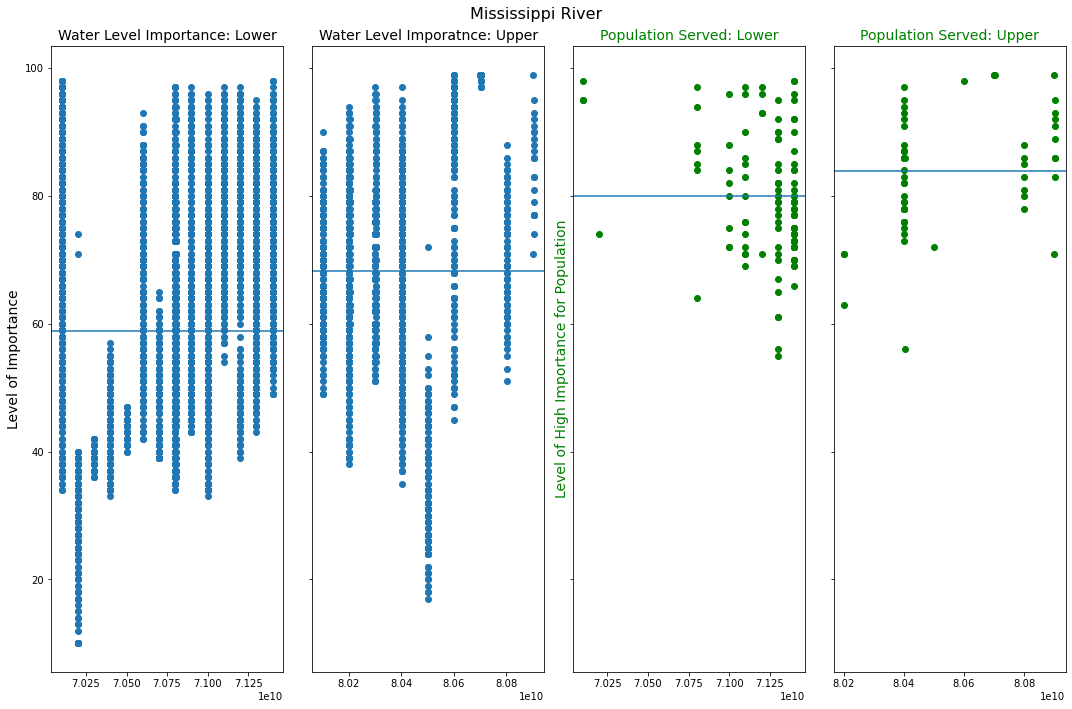

In [13]:
huc_miss_riv = huc_area(df, 700, 900, 'IMP1')
miss_riv_pop = pop_total(huc_miss_riv)
pop_served_graphs_upper_lower(800, 'Mississippi River', miss_riv_pop, huc_miss_riv)

In [83]:
def pop_served_graphs_reg(name_label, pop, huc_area): 
    #range of ints to set the graphs for starting - iterate over HUC's in the data. 
    fig, ax = plt.subplots(1, 2, sharey='row', figsize=(15, 10))
    df_imp0 = huc_area['IMP1']
    df_lower = huc_area['HUC_12']
    ax[0].scatter(df_lower, df_imp0)
    ax[0].set_title('Water Level Importance', size=14)
    ax[0].set_ylabel('Level of Importance', size=14)
    mean = df_imp0 = huc_area['IMP1'].mean()
    ax[0].axhline(mean)
    ax[0].scatter(pop['HUC_12'], pop['threats_per'], marker = 'x', color='red')
    pop_80 = pop[pop['threats_per'] >= 80]


    df_pop0 = pop['IMP1']
    df_lower_pop = pop['HUC_12']
    ax[1].scatter(df_lower_pop, df_pop0, color='green')
    ax[1].set_title('Population Served', size=14, color='green')
    ax[1].set_ylabel('Level of High Importance for Population', size=14, color='green')
    pop_mean = pop['IMP1'].mean()
    ax[1].axhline(pop_mean)
    ax[1].scatter(pop_80['HUC_12'], pop_80['threats_per'], marker = 'x', color='red')
    plt.suptitle(name_label, size=16)
    plt.tight_layout()
    ax

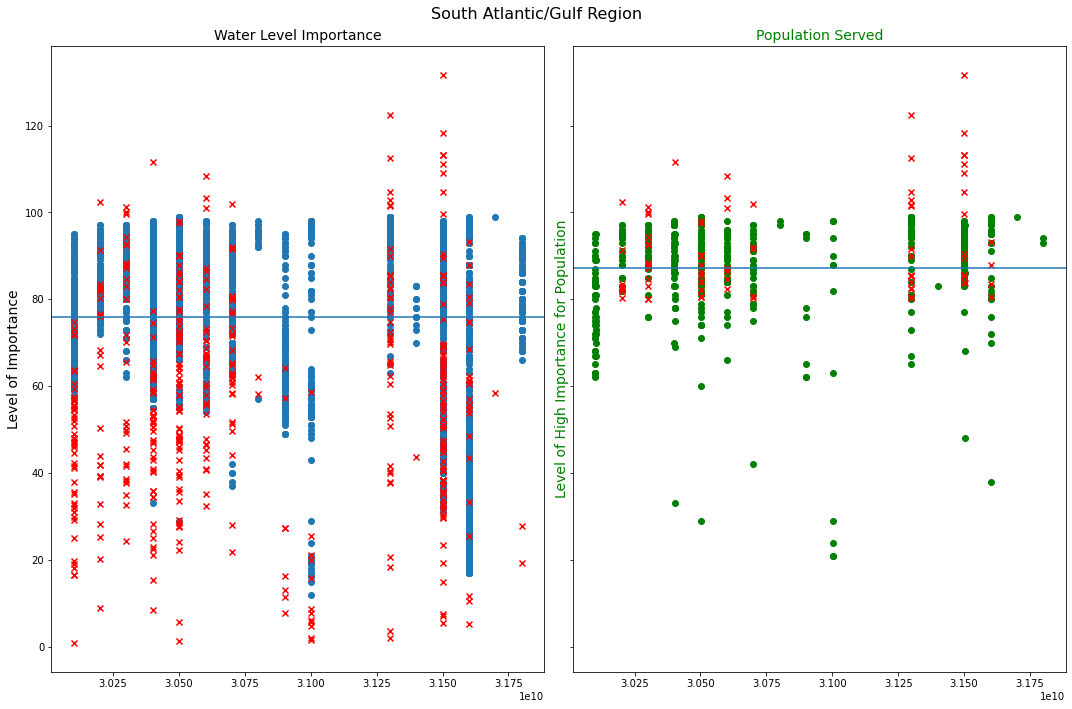

In [84]:
huc_satl_gulf = huc_area(df, 300, 400, 'IMP1')
satl_gulf_pop = huc_area(huc_satl_gulf, 300, 400, 'POPSERVED')
pop_served_graphs_reg('South Atlantic/Gulf Region', satl_gulf_pop, huc_satl_gulf)



In [ ]:
'''fig, ax = plt.subplots(1, 4, sharey='row', figsize=(15, 10))
df_imp0 = df_co.loc[df_co['HUC_12'] < 150000000000,'IMP1']
df_lower = df_co.loc[df_co['HUC_12'] < 150000000000, 'HUC_12']
df_imp1 = df_co.loc[df_co['HUC_12'] >= 150000000000,'IMP1']
df_upper = df_co.loc[df_co['HUC_12'] >= 150000000000, 'HUC_12']
ax[0].scatter(df_lower, df_imp0)
ax[1].scatter(df_upper, df_imp1)
ax[0].set_title('Water Level Importance: Lower', size=14)
ax[1].set_title('Water Level Imporatnce: Upper', size=14)
ax[0].set_ylabel('Level of Importance', size=14)
co_mean = df_imp0 = df_co.loc[df_co['HUC_12'] < 150000000000,'IMP1'].mean()
co_mean1 = df_imp0 = df_co.loc[df_co['HUC_12'] > 150000000000,'IMP1'].mean()
ax[0].axhline(co_mean)
ax[1].axhline(co_mean1)


df_pop0 = pop.loc[pop['HUC_12'] < 150000000000,'IMP1']
df_lower_pop = pop.loc[pop['HUC_12'] < 150000000000, 'HUC_12']
df_pop1 = pop.loc[pop['HUC_12'] >= 150000000000,'IMP1']
df_upper_pop = pop.loc[pop['HUC_12'] >= 150000000000, 'HUC_12']
ax[2].scatter(df_lower_pop, df_pop0, color='green')
ax[3].scatter(df_upper_pop, df_pop1, color='green')
ax[2].set_title('Population Served: Lower', size=14, color='green')
ax[3].set_title('Population Served: Upper', size=14, color='green')
ax[2].set_ylabel('Level of High Importance for Population', size=14, color='green')
pop_mean = pop.loc[pop['HUC_12'] < 150000000000,'IMP1'].mean()
pop_mean1 = pop.loc[pop['HUC_12'] > 150000000000,'IMP1'].mean()
ax[2].axhline(pop_mean)
ax[3].axhline(pop_mean1)
plt.suptitle('Colorado River', size=16)
plt.tight_layout()

'''